# Datasets Generation

In [12]:
import csv
import os

from random import uniform as unif

import networkx as nx

import numpy as np
from numpy import linalg as LA
import scipy as sp
from scipy import stats

import matplotlib as mpl
mpl.use("Agg")  # Must come after importing mpl, but before importing plt
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\ProgramData\Anaconda3\envs\py35\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [13]:
out_folder = "./datasets/set1"

In [14]:
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

## Characteristic

In [15]:
datasets = {
    "lvl1": {
        "number": 10,
        "coordinate" : [(unif(20,100),unif(20,70)) for i in range(10)],
        "metadata": {
            "color": ["red" for i in range(10)],
            "size":  [10 for i in range(10)],
        }
    },
    "lvl2": {
        "number": 10,
        "coordinate" : [(unif(20,100),unif(20,70)) for i in range(10)],
        "metadata": {
            "color": ["green" for i in range(10)],
            "size":  [20 for i in range(10)],
        }
    },
    "lvl3": {
        "number": 10,
        "coordinate" : [(unif(20,100),unif(20,70)) for i in range(10)],
        "metadata": {
            "color": ["blue" for i in range(10)],
            "size":  [30 for i in range(10)],
        }
    }
}

## Refactoring data

In [39]:
for dataset in datasets:
    d = datasets[dataset]
    
    d["coordinate"] = sorted(d["coordinate"], key=lambda k: [k[0], k[1]])

# Dataset representation

In [41]:
def draw_dataset(datasets):
    G = nx.Graph()
    nbr_nodes = 0

    for dataset in datasets:
        d = datasets[dataset]

        for i,xy in enumerate(d["coordinate"]):
            G.add_node(i+nbr_nodes,
               pos=xy,color=d["metadata"]["color"][i],
               size=d["metadata"]["size"][i])

        nbr_nodes += d["number"]

    # Prepare drawing
    pos    = nx.get_node_attributes(G,'pos')
    colors = list(nx.get_node_attributes(G,'color').values())
    size   = list(nx.get_node_attributes(G,'size').values())

    # Draw
    nx.draw_networkx(
        G,pos, node_color=colors,
        node_size=size, with_labels=False
    )

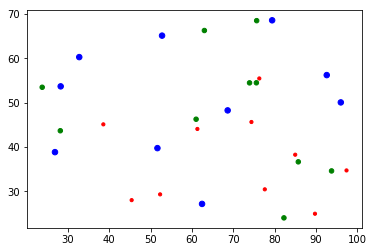

In [42]:
draw_dataset(datasets)

## Dataset Metrics

In [74]:
def distance_matrices(datasets):
    M = {}

    for dataset1 in datasets:
        d1 = datasets[dataset1]
        for dataset2 in datasets:
            d2 = datasets[dataset2]
            
            M[dataset1+dataset2] = np.zeros((d1["number"],d2["number"]))

            for i,ixy in enumerate(d1["coordinate"]):
                for j,jxy in enumerate(d2["coordinate"]):
                    M[dataset1+dataset2][i][j] = LA.norm(np.subtract(ixy,jxy))
                
    return M

In [75]:
dist = distance_matrices(datasets)

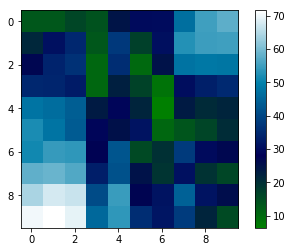

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(dist["lvl1lvl3"], interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [ ]:
def distance_matrices(datasets):
    M = {}

    for dataset in datasets:
        d1 = datasets[dataset]
        

        M[dataset] = np.zeros((d["number"],d["number"]))

        for i,ixy in enumerate(d["coordinate"]):
            for j,jxy in enumerate(d["coordinate"]):
                M[dataset][i][j] = LA.norm(np.subtract(ixy,jxy))
                
    return M